✅ GlenAtom style 'line' applied successfully.
✅ Reading HILLS file with headers: ['time', 'path1.spath', 'path1.zpath', 'sigma_path1.spath', 'sigma_path1.zpath', 'height', 'biasf']

--- Data loaded successfully into DataFrame ---
   time  path1.spath  path1.zpath  sigma_path1.spath  sigma_path1.zpath  \
0    50     1.920362    -1.452786                0.1                0.1   
1   100     1.904660    -1.502208                0.1                0.1   
2   150     1.883461    -1.278408                0.1                0.1   
3   200     1.802502    -0.759564                0.1                0.1   
4   250     1.835989    -0.878494                0.1                0.1   

     height  biasf  
0  1.111111     10  
1  1.072475     10  
2  1.098667     10  
3  1.111111     10  
4  1.090380     10  


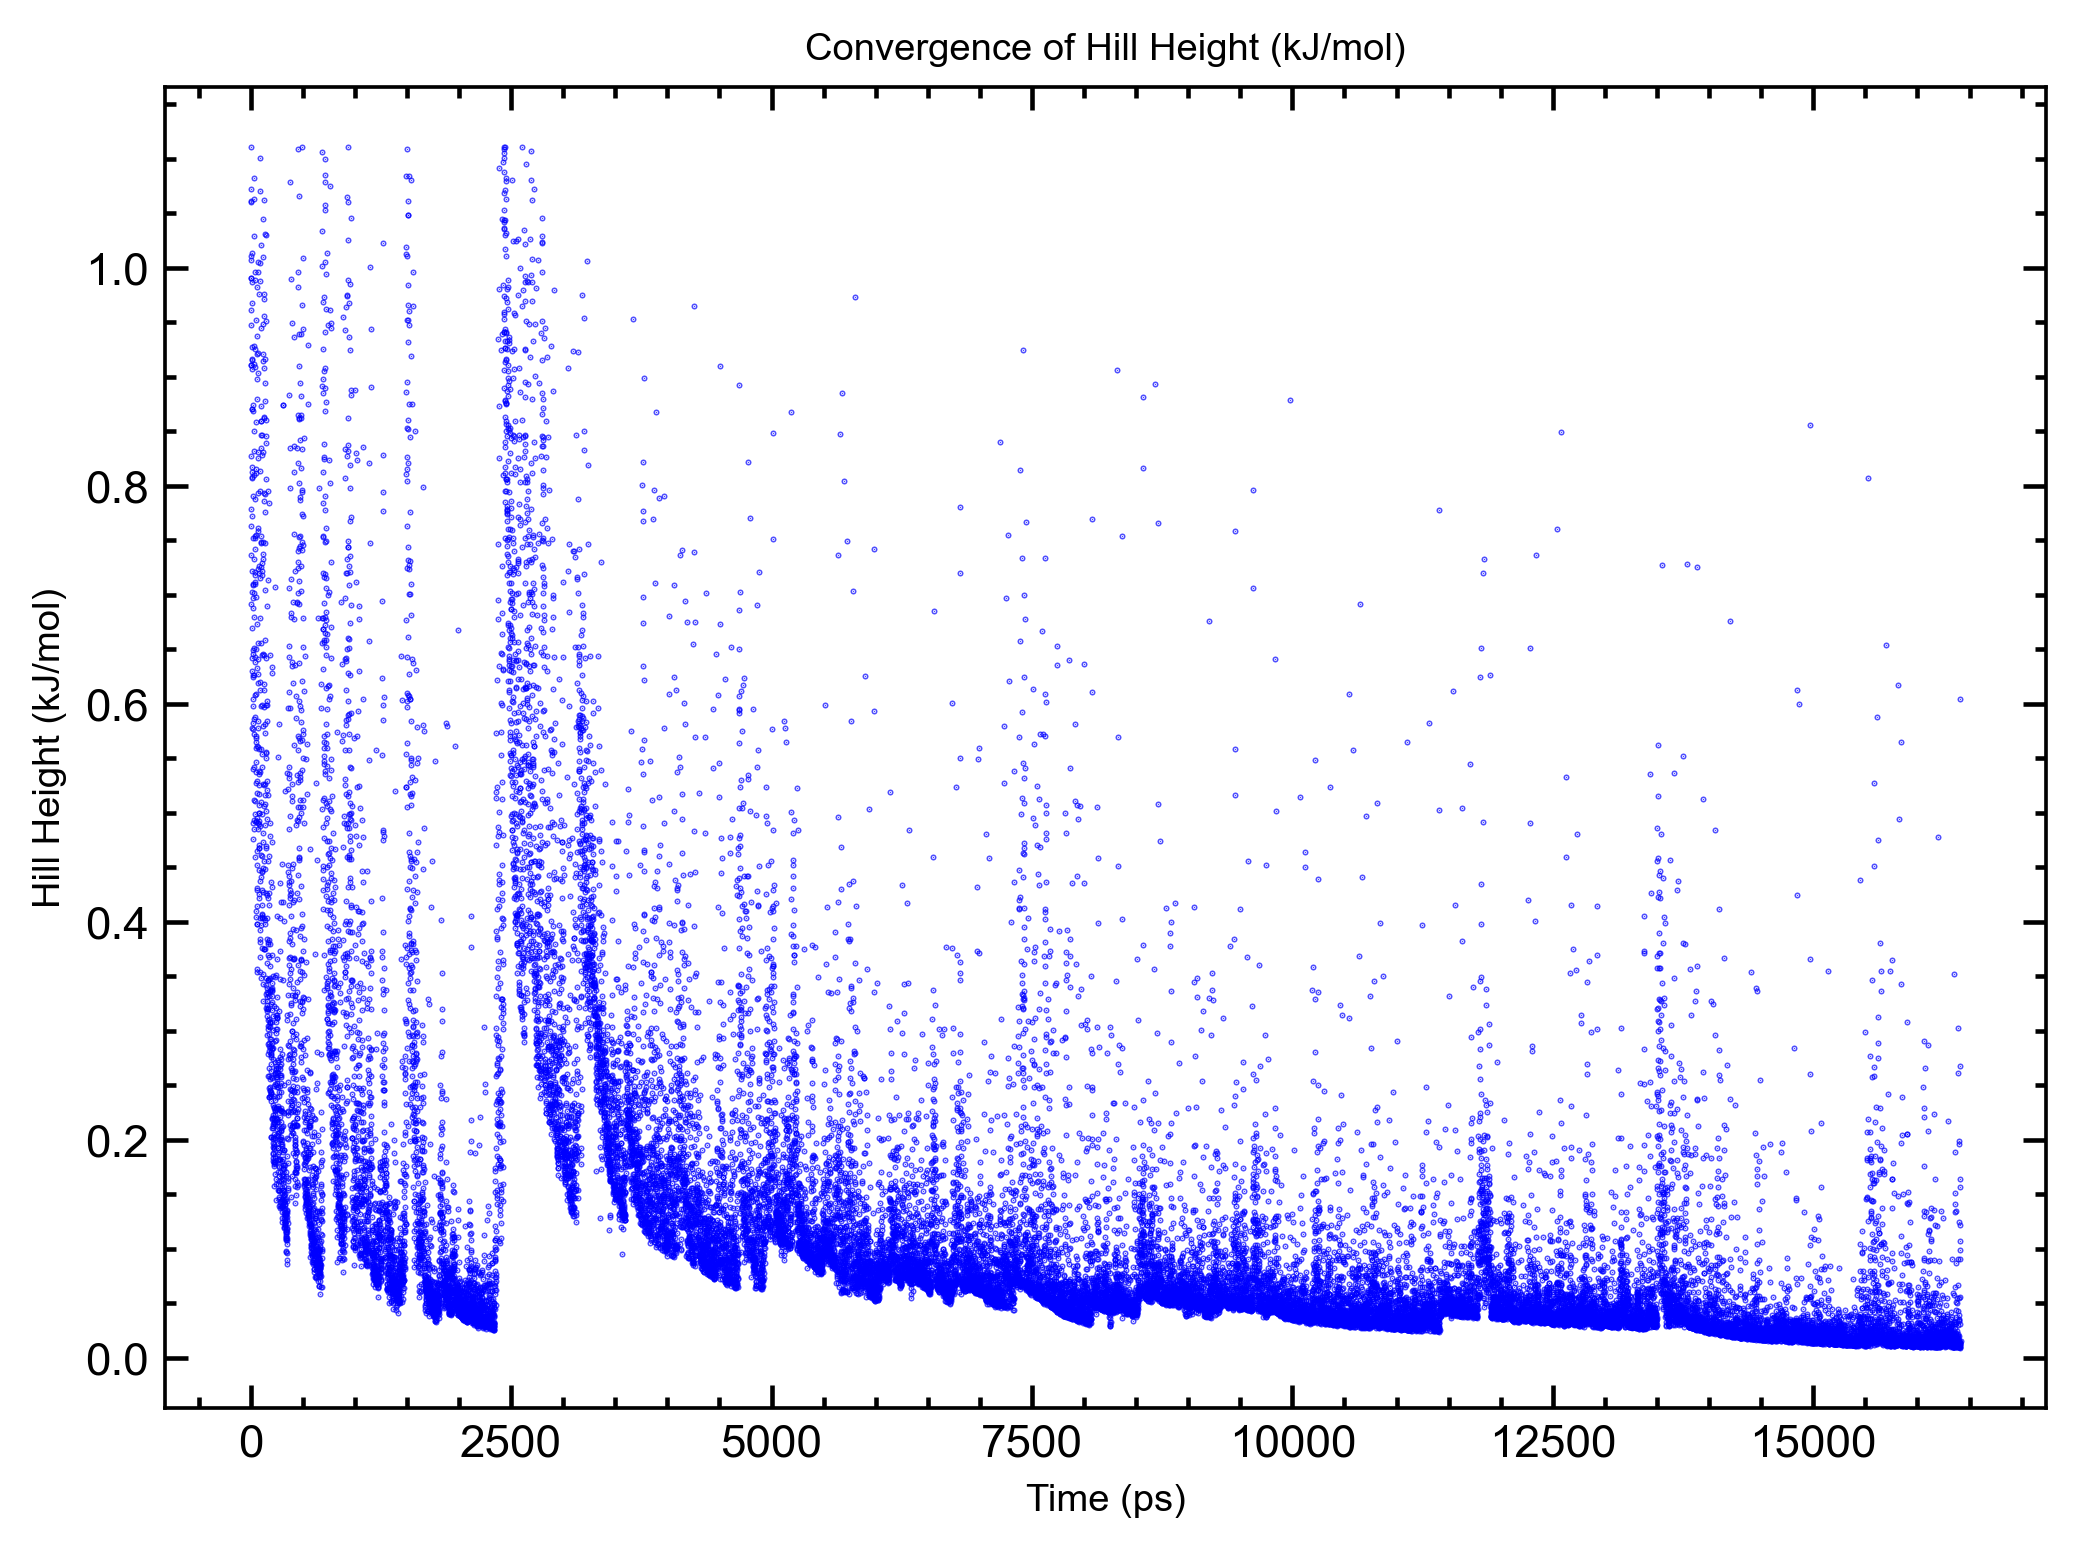

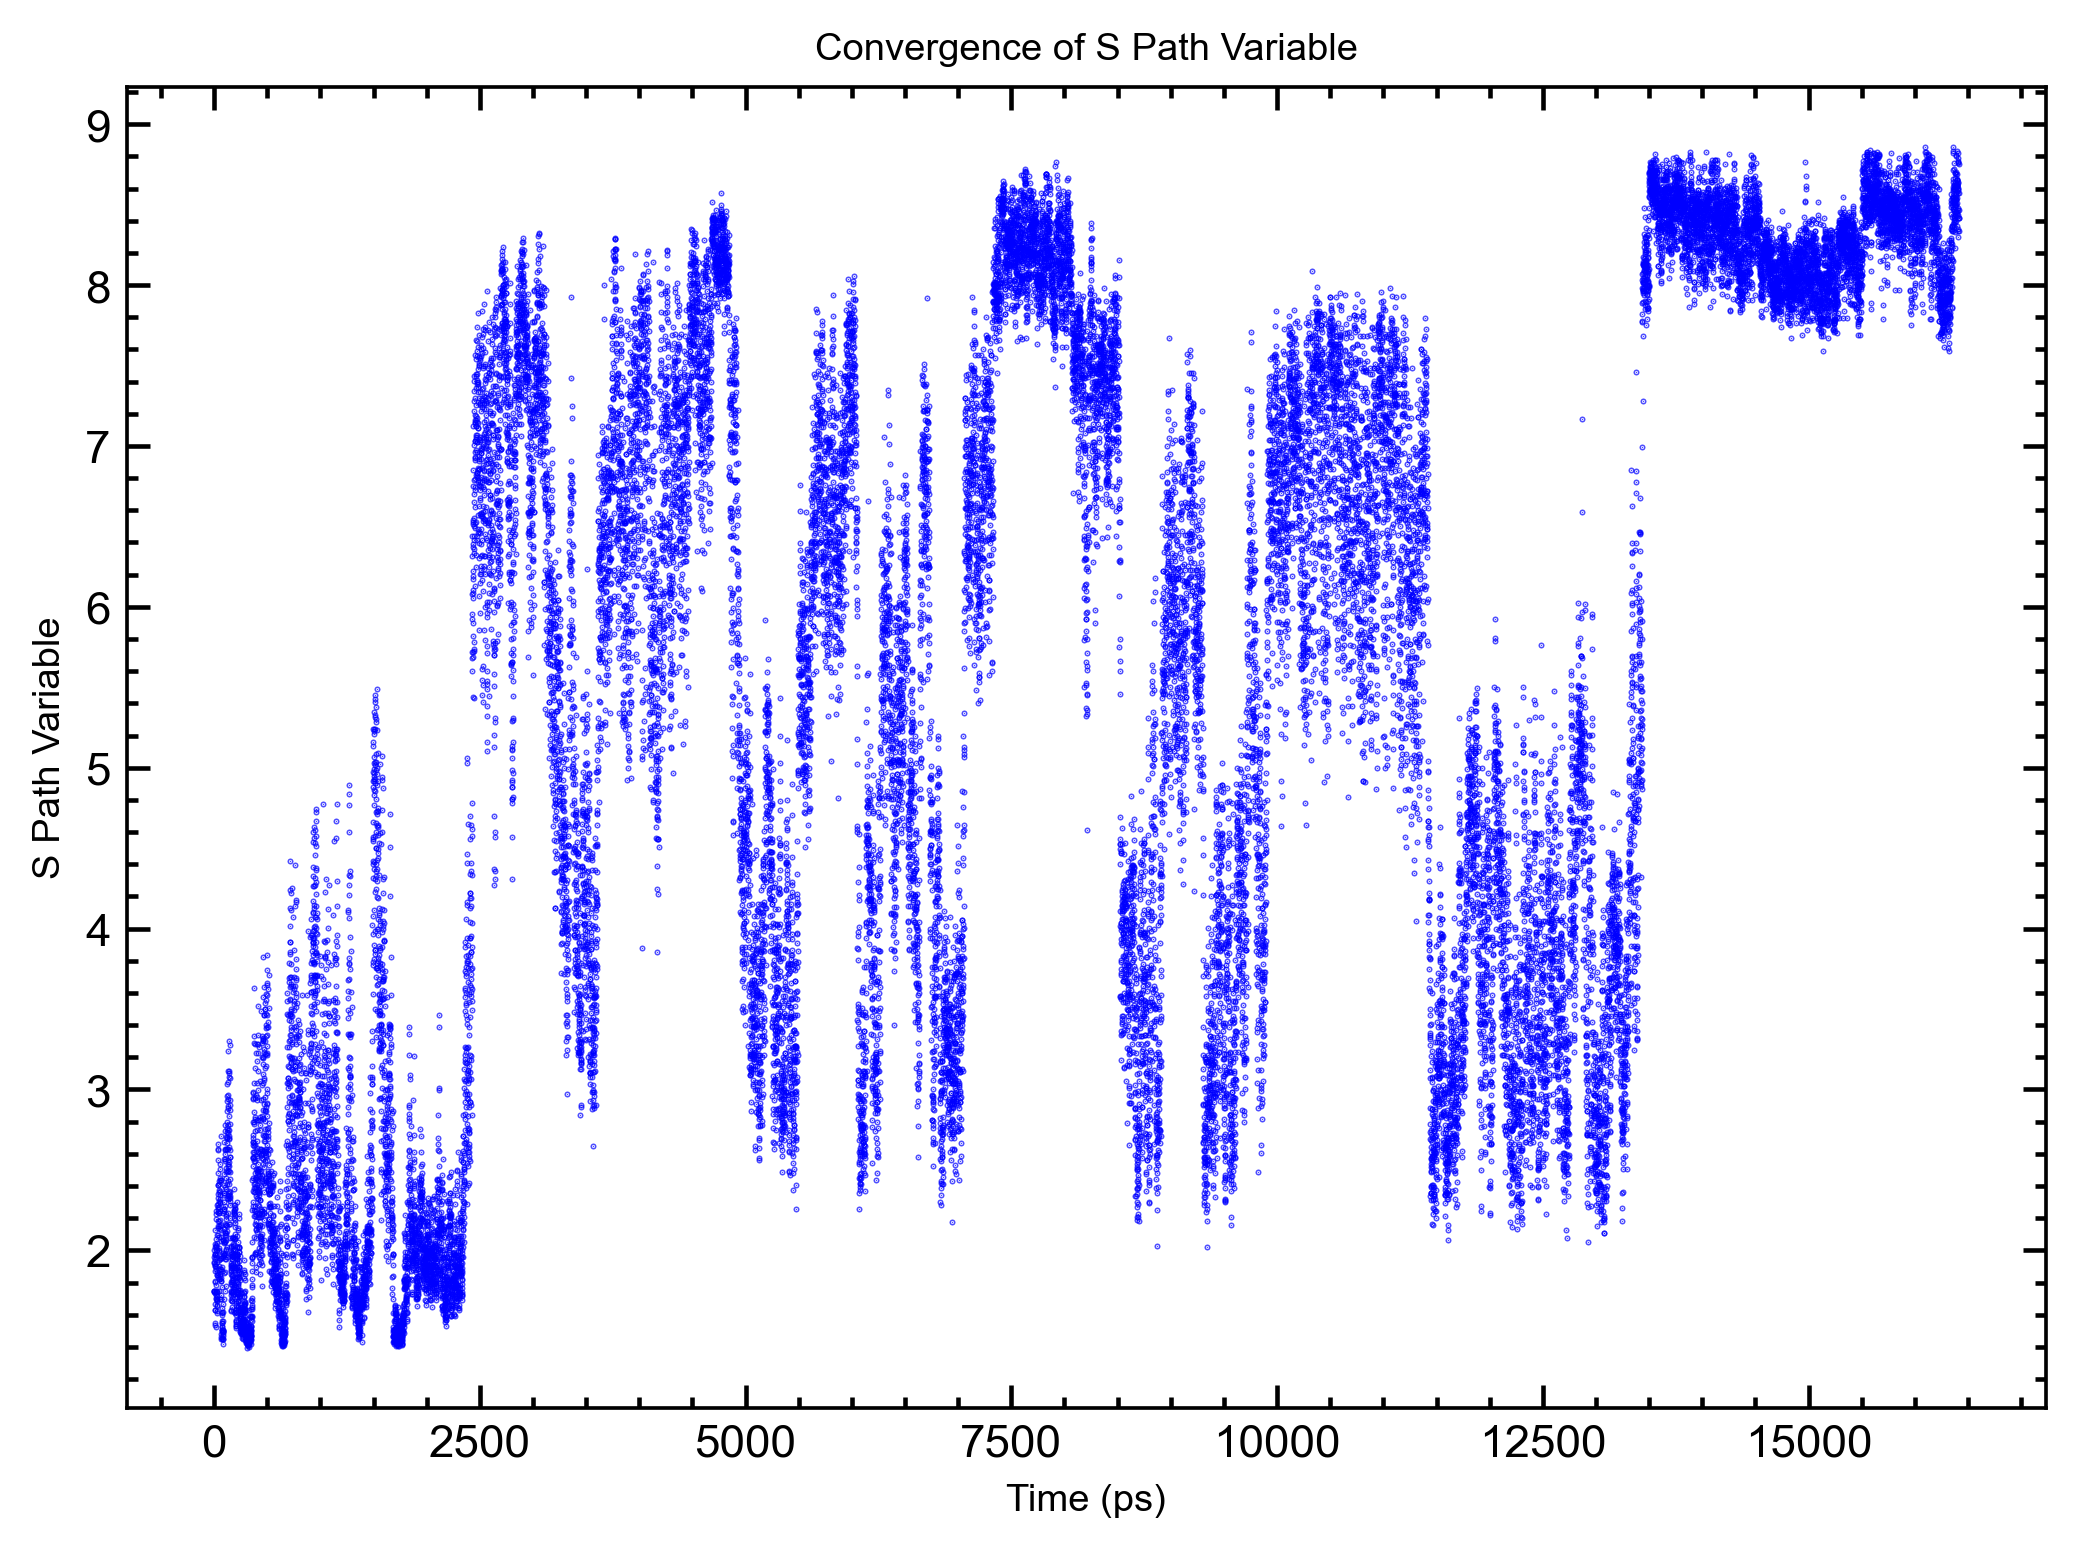

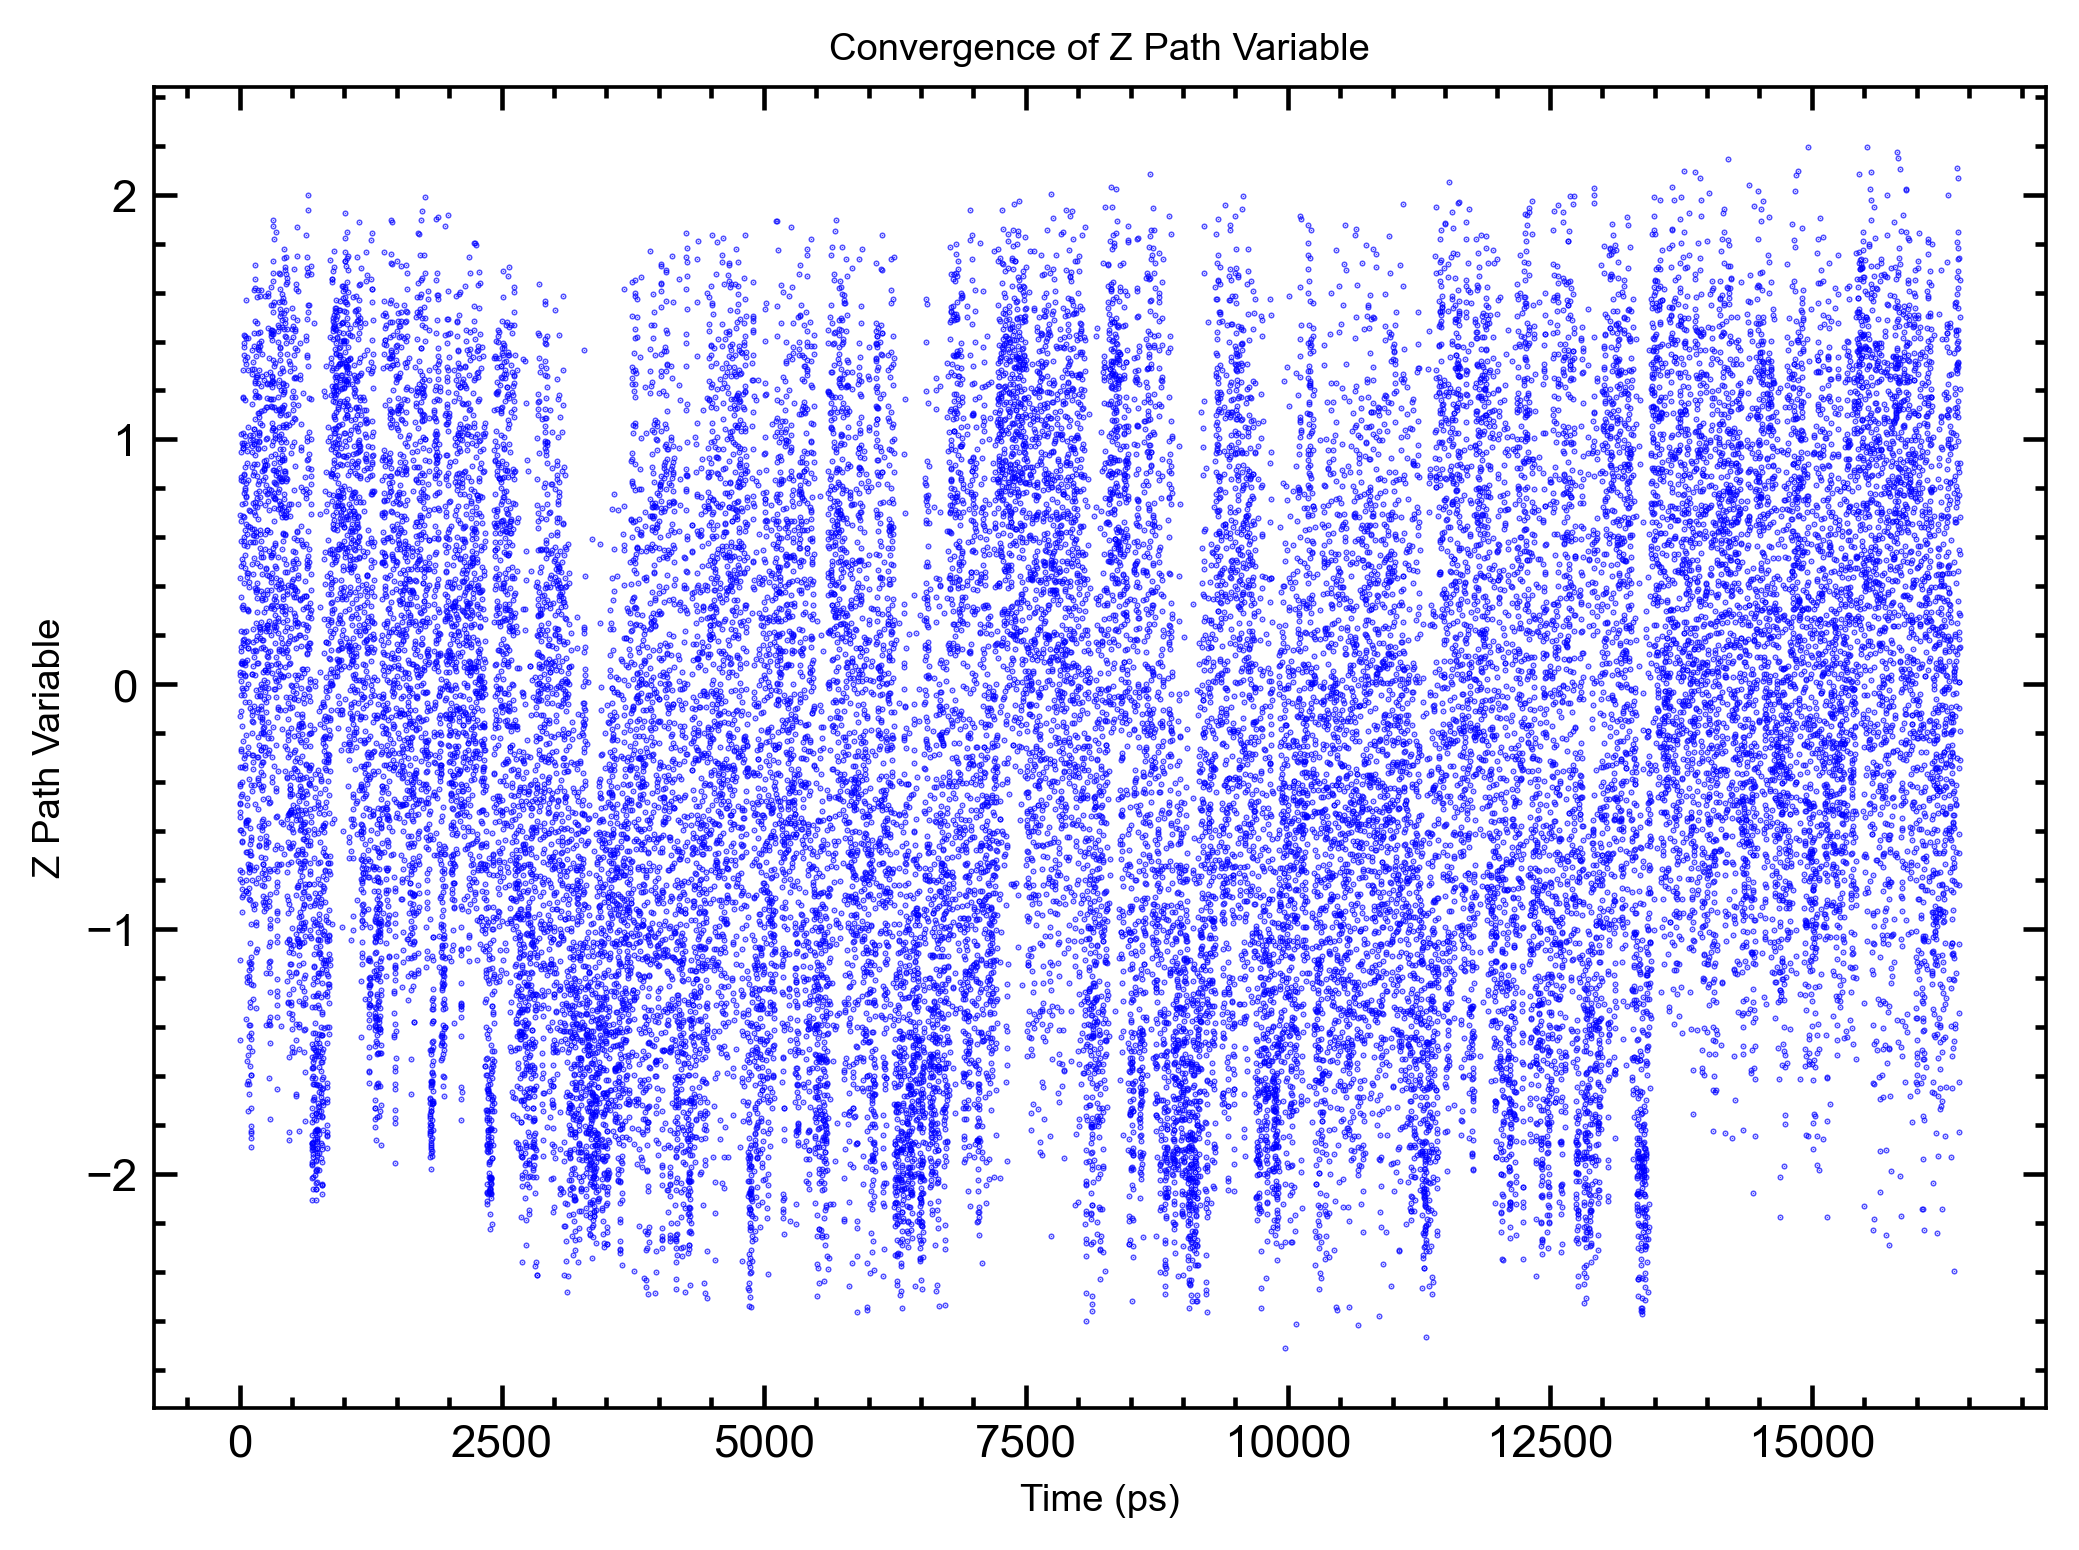

In [2]:
# tutorials/03_metadynamics_analysis.ipynb

import matplotlib.pyplot as plt
import glenatom as glen
from glenatom import metad  # 우리의 metad 모듈
#import glenatom.metad as metad  # 우리의 metad 모듈
import os

glen.fiddich('line')
# --- 2. 데이터 로드 ---
# HILLS 파일이 있는 디렉토리
sim_dir = '/nas/stkim1215/1_SAIT/01_Gen/01_AL/32/2_MD/02_2_analysis' 

try:
    # 단 한 줄로 데이터를 깔끔하게 불러옵니다.
    hills_dataframe = metad.read_hills_file(sim_dir)
    print("\n--- Data loaded successfully into DataFrame ---")
    print(hills_dataframe.head()) # 데이터 앞부분 확인

    # --- 3. 원하는 모든 열에 대해 그래프 그리기 ---
    cols_to_plot = ['height', 'path1.spath', 'path1.zpath']
    y_labels = ['Hill Height (kJ/mol)', 'S Path Variable', 'Z Path Variable']

    for col, label in zip(cols_to_plot, y_labels):
        
        # 1. 새로운 그림 생성
        fig, ax = plt.subplots()
        
        # 2. 핵심 플로팅 함수 호출
        metad.plot_test(hills_dataframe, y_col=col, ax=ax, alpha=0.7, color='blue', s=0.1)
        
        # 3. 사용자 레벨에서 그래프 꾸미기 (스타일 적용됨)
        ax.set_title(f'Convergence of {label}')
        ax.set_xlabel('Time (ps)')
        ax.set_ylabel(label)
        
        # 4. 저장 및 출력
        plt.tight_layout()

except (FileNotFoundError, ValueError, IOError) as e:
    print(e)